In [8]:
from glob import glob
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import MDAnalysis as mda

In [9]:
# Function to compute the distance between the atoms defining an isopeptide bond

def calculate_isopeptide_distance(pdb_names, sel_A, sel_B):
    """
        Compute distances between the selected atoms. The function
        return multiple values when multiple pdb_names OR multiframe
        pdb-s are used.
         pdb_names : a single pdb or a list of pdb-s
    """
    if type(pdb_names) is not list:
        pdb_names = [pdb_names,]

    u = mda.Universe(
        *pdb_names,
        all_coordinates = True,  # To use also the first frame.
    )

    ag_A = u.select_atoms(sel_A)
    ag_B = u.select_atoms(sel_B)

    distances = np.zeros((u.trajectory.n_frames))
    for i,ts in enumerate(u.trajectory):
        distances[i] = np.linalg.norm(ag_A.positions - ag_B.positions)
    
    return distances

In [10]:
# Compute the isopeptide bond length from the reference structures.

ref_models = [
              '5ymy',
              '6isu',
              '6tuv',
              '6ud0',
              '7keo',
              '7m4n',
              # '7uyh', UNRESOLVED LINKER
              # '9avt', UNRESOLVED LINKER
             ]

ref_linkages = {'5ymy'     : ["segid A and resid 48 and name CB", "segid B and resid 76 and name C"],
                '6isu'     : ["segid C and resid 27 and name CB", "segid B and resid 76 and name C"],
                '6tuv'     : ["segid H and resid 48 and name CB", "segid D and resid 76 and name C"],
                '6ud0'     : ["segid B and resid 63 and name CB", "segid A and resid 76 and name C"],
                '7keo'     : ["segid C and resid 29 and name CB", "segid D and resid 76 and name C"],
                '7m4n'     : ["segid F and resid 63 and name CB", "segid D and resid 76 and name C"],
                # '7uyh'     : ["segid A and resid  6 and name CB", "segid B and resid 76 and name C"], UNRESOLVED LINKER
                # '9avt'     : ["segid A and resid  6 and name CB", "segid B and resid 76 and name C"], UNRESOLVED LINKER
           }

ref_distances = {}
for ref_model in ref_models:
    print (ref_model)
    linkage = ref_linkages[ref_model]
    d = calculate_isopeptide_distance('../../04_Ref_structures/'+ref_model+'.pdb', linkage[0], linkage[1])
    ref_distances[ref_model] = d

ref_merged = np.concatenate(list(ref_distances.values()))

5ymy
6isu
6tuv
6ud0
7keo
7m4n


In [11]:
# Compute the isopeptide bond length from the AF2 predictions without/with imposed bond.
# As the default AF2 predictions do not know about bonds, the chains must be permuted to
# allow linkages both ways (between A-K48 and B-G76 as well as A-G76 and B-K48)

models = [
              '5ymy',
              '5ymy-bond',
              '6isu',
              '6isu-bond',
              '6tuv',
              '6tuv-bond',
              '6ud0',
              '6ud0-bond',
              '7keo',
              '7keo-bond',
              '7m4n',
              '7m4n-bond',
              '7uyh',
              '7uyh-bond',
              '9avt',
              '9avt-bond',
             ]

#Change paths according to local file structure

model_dirs = {
              '5ymy': "../../02_AF2.2/alphapulldown_output/ADRM1-1-150_and_UBQ_and_UBQ/",
              '5ymy-bond': "../../02_AF2.2/alphapulldown_output/ADRM1-1-150_and_UBQ_K48C_and_UBQ_77C/",
              '6isu':"../../02_AF2.2/alphapulldown_output/UCHL3_and_UBQ_and_UBQ/",
              '6isu-bond':"../../02_AF2.2/alphapulldown_output/UCHL3_and_UBQ_K27C_and_UBQ_77C/",
              '6tuv':"../../02_AF2.2/alphapulldown_output/Mindy1-110-384_and_UBQ_and_UBQ/",
              '6tuv-bond':"../../02_AF2.2/alphapulldown_output/Mindy1-110-384_and_UBQ_K48C_and_UBQ_77C/",
              '6ud0':"../../02_AF2.2/alphapulldown_output/Tsg101-1-145_and_UBQ_and_UBQ/",
              '6ud0-bond':"../../02_AF2.2/alphapulldown_output/Tsg101-1-145_and_UBQ_K63C_and_UBQ_77C/",
              '7keo':"../../02_AF2.2/alphapulldown_output/7KEO-chain-1_and_7KEO-chain-2_and_UBQ_and_UBQ/",
              '7keo-bond':"../../02_AF2.2/alphapulldown_output/7KEO-chain-1_and_7KEO-chain-2_and_UBQ_K29C_and_UBQ_77C/",
              '7m4n':"../../02_AF2.2/alphapulldown_output/RNF216-649-784_and_UBQ_and_UBQ/",
              '7m4n-bond':"../../02_AF2.2/alphapulldown_output/RNF216-649-784_and_UBQ_K63C_and_UBQ_77C/",
              '7uyh':"../../02_AF2.2/alphapulldown_output/LotA-1-276_and_UBQ_and_UBQ/",
              '7uyh-bond':"../../02_AF2.2/alphapulldown_output/LotA-1-276_and_UBQ_K6C_and_UBQ_77C/",
              '9avt':"../../02_AF2.2/alphapulldown_output/TAB2-664-693_and_UBQ_and_UBQ/",
              '9avt-bond':"../../02_AF2.2/alphapulldown_output/TAB2-664-693_and_UBQ_K6C_and_UBQ_77C/",
}

# Linkages reflecting the bonded connections
linkages = {'5ymy'     : ["segid C and resid 48 and name CB", "segid D and resid 76 and name C"],
            '5ymy-bond': ["segid C and resid 48 and name CB", "segid D and resid 76 and name C"],
            '6isu'     : ["segid C and resid 27 and name CB", "segid D and resid 76 and name C"],
            '6isu-bond': ["segid C and resid 27 and name CB", "segid D and resid 76 and name C"],
            '6tuv'     : ["segid C and resid 48 and name CB", "segid D and resid 76 and name C"],
            '6tuv-bond': ["segid C and resid 48 and name CB", "segid D and resid 76 and name C"],
            '6ud0'     : ["segid C and resid 63 and name CB", "segid D and resid 76 and name C"],
            '6ud0-bond': ["segid C and resid 63 and name CB", "segid D and resid 76 and name C"],
            '7keo'     : ["segid D and resid 29 and name CB", "segid E and resid 76 and name C"],
            '7keo-bond': ["segid D and resid 29 and name CB", "segid E and resid 76 and name C"],
            '7m4n'     : ["segid C and resid 63 and name CB", "segid D and resid 76 and name C"],
            '7m4n-bond': ["segid C and resid 63 and name CB", "segid D and resid 76 and name C"],
            '7uyh'     : ["segid C and resid  6 and name CB", "segid D and resid 76 and name C"],
            '7uyh-bond': ["segid C and resid  6 and name CB", "segid D and resid 76 and name C"],
            '9avt'     : ["segid C and resid  6 and name CB", "segid D and resid 76 and name C"],
            '9avt-bond': ["segid C and resid  6 and name CB", "segid D and resid 76 and name C"],
           }

# Alternative linkages with permuted chainID-s
# NOTE: there's no rerunning for the bonded systems. The entries are here only as placeholders
alt_linkages = {'5ymy'     : ["segid D and resid 48 and name CB", "segid B and resid 76 and name C"],
            '5ymy-bond': ["segid D and resid 48 and name CB", "segid C and resid 76 and name C"],
            '6isu'     : ["segid D and resid 27 and name CB", "segid C and resid 76 and name C"],
            '6isu-bond': ["segid D and resid 27 and name CB", "segid C and resid 76 and name C"],
            '6tuv'     : ["segid D and resid 48 and name CB", "segid C and resid 76 and name C"],
            '6tuv-bond': ["segid D and resid 48 and name CB", "segid C and resid 76 and name C"],
            '6ud0'     : ["segid D and resid 63 and name CB", "segid C and resid 76 and name C"],
            '6ud0-bond': ["segid D and resid 63 and name CB", "segid C and resid 76 and name C"],
            '7keo'     : ["segid E and resid 29 and name CB", "segid D and resid 76 and name C"],
            '7keo-bond': ["segid E and resid 29 and name CB", "segid D and resid 76 and name C"],
            '7m4n'     : ["segid D and resid 63 and name CB", "segid C and resid 76 and name C"],
            '7m4n-bond': ["segid D and resid 63 and name CB", "segid C and resid 76 and name C"],
            '7uyh'     : ["segid D and resid  6 and name CB", "segid C and resid 76 and name C"],
            '7uyh-bond': ["segid D and resid  6 and name CB", "segid C and resid 76 and name C"],
            '9avt'     : ["segid D and resid  6 and name CB", "segid C and resid 76 and name C"],
            '9avt-bond': ["segid D and resid  6 and name CB", "segid C and resid 76 and name C"],
           }


distances = {}
# Loop over all model directories
for model in models:
    
    print (model)

    # Get PDB names, and linkages for selection strings
    #Disulfide bonds also occur in non-bond models, e.g., naturally, so it is better to not consider Hydrogens at all
    pdb_names = glob(f'{model_dirs[model]}ranked*.pdb')

    print(pdb_names)
    linkage = linkages[model]
    
    try:
        # Compute and store the distance
        d = calculate_isopeptide_distance(pdb_names, linkage[0], linkage[1])
        distances[model] = d
    except:
        distances[model] = np.array([np.nan]*len(pdb_names))
    
    # Permute the predictions without isopeptide bond
    if not "bond" in model:
        print (f" Permuting {model}")
        linkage = alt_linkages[model]
        try:
            d = calculate_isopeptide_distance(pdb_names, linkage[0], linkage[1])
            distances[model] = np.minimum(d, distances[model])
        except:
            pass

5ymy
['../../02_AF2.2/alphapulldown_output/ADRM1-1-150_and_UBQ_and_UBQ/ranked_14.pdb', '../../02_AF2.2/alphapulldown_output/ADRM1-1-150_and_UBQ_and_UBQ/ranked_24.pdb', '../../02_AF2.2/alphapulldown_output/ADRM1-1-150_and_UBQ_and_UBQ/ranked_20.pdb', '../../02_AF2.2/alphapulldown_output/ADRM1-1-150_and_UBQ_and_UBQ/ranked_17.pdb', '../../02_AF2.2/alphapulldown_output/ADRM1-1-150_and_UBQ_and_UBQ/ranked_8.pdb', '../../02_AF2.2/alphapulldown_output/ADRM1-1-150_and_UBQ_and_UBQ/ranked_3.pdb', '../../02_AF2.2/alphapulldown_output/ADRM1-1-150_and_UBQ_and_UBQ/ranked_4.pdb', '../../02_AF2.2/alphapulldown_output/ADRM1-1-150_and_UBQ_and_UBQ/ranked_9.pdb', '../../02_AF2.2/alphapulldown_output/ADRM1-1-150_and_UBQ_and_UBQ/ranked_10.pdb', '../../02_AF2.2/alphapulldown_output/ADRM1-1-150_and_UBQ_and_UBQ/ranked_12.pdb', '../../02_AF2.2/alphapulldown_output/ADRM1-1-150_and_UBQ_and_UBQ/ranked_13.pdb', '../../02_AF2.2/alphapulldown_output/ADRM1-1-150_and_UBQ_and_UBQ/ranked_6.pdb', '../../02_AF2.2/alphapulldo

In [12]:
for key in distances.keys():
    print(key, len(distances[key]))

5ymy 25
5ymy-bond 25
6isu 25
6isu-bond 25
6tuv 25
6tuv-bond 25
6ud0 25
6ud0-bond 25
7keo 25
7keo-bond 25
7m4n 25
7m4n-bond 25
7uyh 25
7uyh-bond 25
9avt 25
9avt-bond 25


In [13]:
# Transfrom the AF3 model data to pandas DataFrame

import pandas as pd

df = pd.DataFrame (distances)
df = df.melt(var_name='PDB', value_name='distance')
df['bond'] = df['PDB'].apply(lambda x: 'yes' if 'bond' in x else 'no')
df['PDB'] = df['PDB'].str.replace('-bond', '', regex=True)

(-0.5, 7.5)


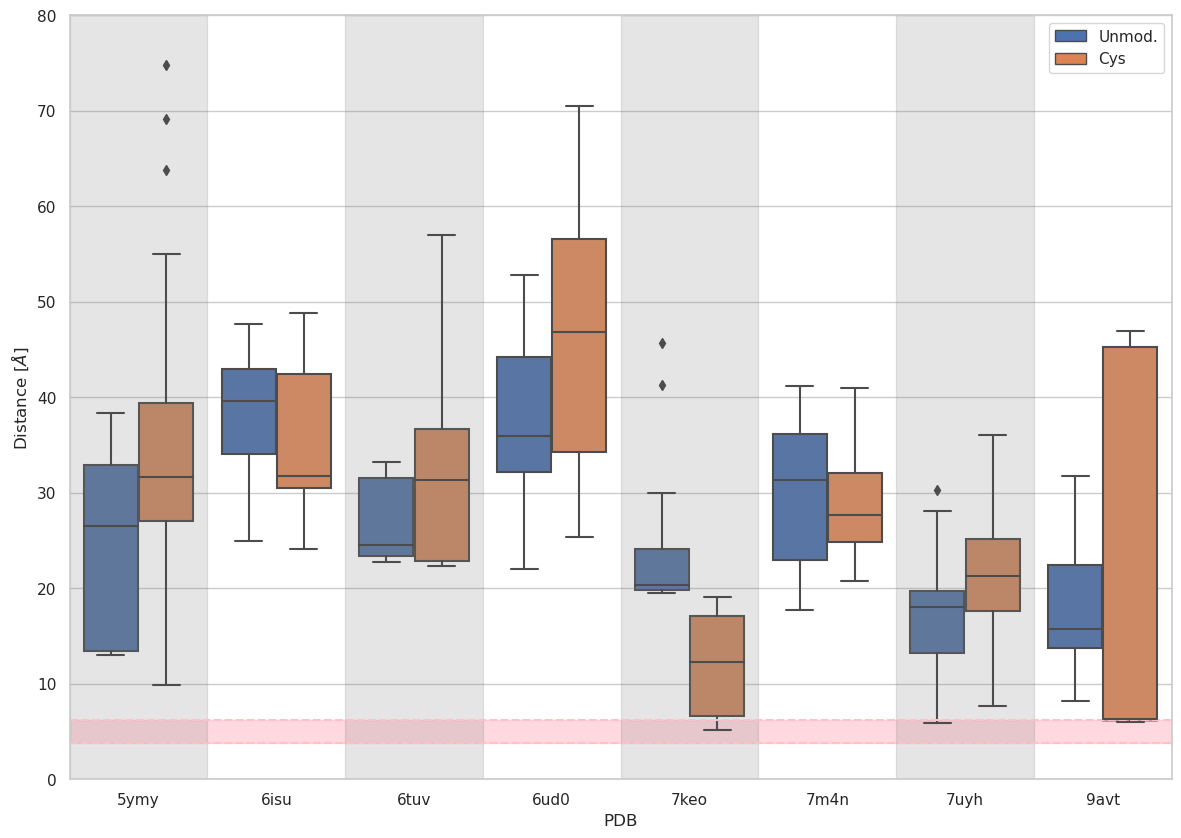

In [16]:
import seaborn
import matplotlib.pyplot as plt

# Get the default color palette
colors = seaborn.color_palette()
colors = [i for index, i in enumerate(colors) if index not in [2]]  #Slightly more color-blind friendly

fig = plt.figure(layout="constrained")

# use to set style of background of plot
seaborn.set_theme(rc={'figure.figsize':(11.7,8.27)})
seaborn.set(style="whitegrid")


ax = seaborn.boxplot(x="PDB", y="distance", hue="bond", hue_order=["no", "yes"], data=df)
ax.set_ylabel(r'Distance [$\AA$]')
ax.set_xlabel("PDB")
ax.legend(title=None, labels=["Unmod.", 'Cys'])
leg = ax.get_legend()
leg.legendHandles[0].set_facecolor(colors[0])
leg.legendHandles[1].set_facecolor(colors[1])
leg.legendHandles[0].set_linewidth(1)
leg.legendHandles[1].set_linewidth(1)

ax.axhspan(ref_merged.min(), ref_merged.max(), color='pink', alpha=0.6)
ax. axhline(y=ref_merged.min(), color='pink', linestyle='--', label='y=10')
ax. axhline(y=ref_merged.max(), color='pink', linestyle='--', label='y=10')

limits = ax.get_xlim()
print (limits)
ax.axvspan(-0.5, 0.5, color='gray', alpha=0.2)
ax.axvspan( 1.5, 2.5, color='gray', alpha=0.2)
ax.axvspan( 3.5, 4.5, color='gray', alpha=0.2)
ax.axvspan( 5.5, 6.5, color='gray', alpha=0.2)
ax.axvspan( 7.5, 8.5, color='gray', alpha=0.2)
ax.set_xlim(limits)
ax.set_ylim([0,80])

# Fill using the PDB disulfide lengths

plt.savefig("AF2.2-isopeptide-bonds.svg", bbox_inches=0, transparent=True)
plt.savefig("AF2.2-isopeptide-bonds.png", bbox_inches=0, transparent=True)
plt.show()